In [21]:
import geopandas as gpd
import geoplot
from glob import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import rasterio
from rasterio.plot import show
import fiona
from descartes import PolygonPatch
from src.utils import cull_geometry, simplify_geometry

In [65]:
wdpa_cont_us = gpd.read_file('data/json/wdpa_contiguous_usa.json', driver='GeoJSON')
wdpa_hi = gpd.read_file('data/json/wdpa_usa_hi.json', driver='GeoJSON')
wdpa_ak = gpd.read_file('data/json/wdpa_usa_ak.json', driver='GeoJSON')

In [107]:
len(wdpa_cont_us)+len(wdpa_hi)+len(wdpa_ak)

32935

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.


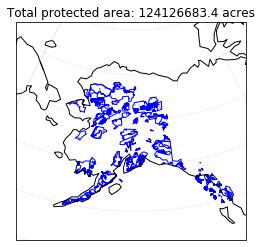

In [106]:
tgt_shp = wdpa_ak.copy()
total = tgt_shp.REP_AREA.sum()*247.105
min_area = 100
tol = 0.1
simp_shp = simplify_geometry(tgt_shp[tgt_shp.REP_AREA>=min_area], tol)

clat = simp_shp.geometry.centroid.y.mean()
clon = simp_shp.geometry.centroid.x.mean()
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
extent = [-170,50,-130,75]
fig, axarr = plt.subplots(1,1, figsize=(8,4),\
                        subplot_kw={'projection':\
                                    geoplot.crs.Orthographic(central_latitude=clat,\
                                              central_longitude=clon)})
geoplot.polyplot(simp_shp, facecolor='none', edgecolor='blue', ax=axarr, extent=extent)
#axarr.set_global()
axarr.outline_patch.set_visible(True)
axarr.coastlines()
axarr.set_title('Total protected area: %0.1f acres'%total)
axarr.gridlines(alpha=.2)
fig.savefig('out/wdpa-ak.png',dpi=200)

/usr/local/lib/python3.6/dist-packages/geoplot/geoplot.py:625: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  extent = gpd.GeoSeries(self.extent) if self.extent is not None else None
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  app.launch_new_instance()


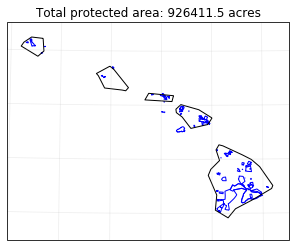

In [105]:
tgt_shp = wdpa_hi.copy()
total = tgt_shp.REP_AREA.sum()*247.105
min_area = 0.1
tol = 0.001
simp_shp = simplify_geometry(tgt_shp[tgt_shp.REP_AREA>=min_area], tol)
clat = simp_shp.geometry.centroid.y.mean()
clon = simp_shp.geometry.centroid.x.mean()
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
extent = [-160,18.5,-154.5,22.5]
fig, axarr = plt.subplots(1,1, figsize=(8,4),\
                        subplot_kw={'projection':\
                                    geoplot.crs.Orthographic(central_latitude=clat,\
                                              central_longitude=clon)})
geoplot.polyplot(simp_shp, facecolor='none', edgecolor='blue', ax=axarr, extent=extent)
#axarr.set_global()
axarr.outline_patch.set_visible(True)
axarr.coastlines()
axarr.set_title('Total protected area: %0.1f acres'%total)
axarr.gridlines(alpha=0.2)
fig.savefig('out/wdpa-hi.png',dpi=200)

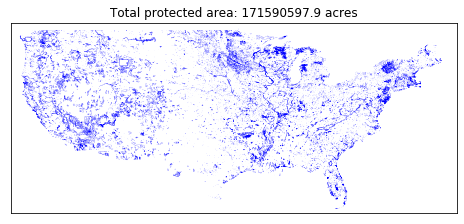

In [104]:
ext=[-126,24,-65,50]
f,axarr = plt.subplots(1,1, figsize=(8,4))
total = wdpa_cont_us.REP_AREA.sum()*247.105
wdpa_cont_us.plot(ax=axarr, facecolor='none',\
                 edgecolor='blue',\
                 linewidth=0.1)
axarr.set_xlim(ext[0],ext[2])
axarr.set_ylim(ext[1],ext[3])
#axarr.outline_patch.set_visible(True)
#axarr.coastlines()
axarr.grid(alpha=0.3)
axarr.set_xticks([])
axarr.set_yticks([])
axarr.set_title('Total protected area: %0.1f acres'%total)
f.savefig('out/wdpa-cont-us',dpi=200)